In [127]:
#import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,r2_score
import missingno as msno
from sklearn.preprocessing import OneHotEncoder

In [128]:
#Read the csv file - using data from 2010-2016 for this example - Salaries are in the 000s
file_path = Path('pitcher_salaries_cleaned.csv')
df = pd.read_csv(file_path)
df


,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started
0,1990,AbbottJim,23.0,185000.0,4.51,246,106,105,16,10,14,635,925.0,0,200.0,75.0,AL,CAL,33
1,1990,AbbottPaul,23.0,100000.0,5.97,37,23,25,0,0,5,104,162.0,0,185.0,75.0,AL,MIN,7
2,1990,AldredScott,22.0,100000.0,3.77,13,6,7,0,1,2,43,63.0,0,195.0,76.0,AL,DET,3
3,1990,AndersonAllan,26.0,300000.0,4.53,214,95,82,20,7,18,566,797.0,0,178.0,71.0,AL,MIN,31
4,1990,AppierKevin,23.0,100000.0,2.76,179,57,127,13,12,8,557,784.0,1,180.0,74.0,AL,KCA,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,2016,WorleyVance,29.0,2600000.0,3.53,84,34,56,11,2,2,260,365.0,13,240.0,74.0,AL,BAL,4
4933,2016,WrightMike,26.0,510500.0,5.79,81,48,50,12,3,4,224,328.0,5,240.0,78.0,AL,BAL,12
4934,2016,WrightSteven,32.0,514500.0,3.33,138,58,127,12,13,6,470,656.0,0,215.0,74.0,AL,BOS,24
4935,2016,YoungChris,37.0,4250000.0,6.19,104,61,94,28,3,9,266,406.0,7,255.0,82.0,AL,KCA,13


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      4937 non-null   int64  
 1   Full Name                 4937 non-null   object 
 2   Age                       4937 non-null   float64
 3   Salary                    4937 non-null   float64
 4   ERA                       4937 non-null   float64
 5   Hits                      4937 non-null   int64  
 6   Earned Runs               4937 non-null   int64  
 7   Strike Outs               4937 non-null   int64  
 8   Home Runs                 4937 non-null   int64  
 9   Wins                      4937 non-null   int64  
 10  Losses                    4937 non-null   int64  
 11  Outs Pitched              4937 non-null   int64  
 12  Batters Faced by Pitcher  4937 non-null   float64
 13  Games Finished            4937 non-null   int64  
 14  Weight  

In [130]:
#look at high salaries
df.sort_values('Salary', ascending = False)

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started
4840,2016,KershawClayton,28.0,33000000.0,1.69,97,28,172,8,12,4,447,544.0,0,225.0,76.0,NL,LAN,21
4677,2015,KershawClayton,27.0,32571000.0,2.13,163,55,301,15,16,7,698,890.0,0,225.0,76.0,NL,LAN,33
4822,2016,GreinkeZack,33.0,31799030.0,4.37,161,77,134,23,13,7,476,667.0,0,200.0,74.0,NL,ARI,26
4885,2016,PriceDavid,31.0,30000000.0,3.99,227,102,228,30,17,9,690,951.0,0,215.0,77.0,AL,BOS,35
4751,2015,VerlanderJustin,32.0,28000000.0,3.38,113,50,113,13,5,8,400,535.0,0,235.0,77.0,AL,DET,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1990,ValeraJulio,22.0,100000.0,6.92,20,10,4,1,1,1,39,64.0,0,185.0,74.0,NL,NYN,3
169,1990,WalkerMike,24.0,100000.0,4.88,82,41,34,6,2,6,227,350.0,2,195.0,74.0,AL,CLE,11
173,1990,WestDavid,26.0,100000.0,5.10,142,83,92,21,7,9,439,646.0,0,205.0,78.0,AL,MIN,27
183,1991,AlvarezWilson,21.0,100000.0,3.51,47,22,32,9,3,2,169,237.0,0,175.0,73.0,AL,CHA,9


In [131]:
#Cleaning data - League
df['League'].value_counts()

NL    2544
AL    2393
Name: League, dtype: int64

In [132]:
#Cleaning data - Full Name and Team
df=df.drop(["Full Name","Team"],1)
df

,Year,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Games Started
0,1990,23.0,185000.0,4.51,246,106,105,16,10,14,635,925.0,0,200.0,75.0,AL,33
1,1990,23.0,100000.0,5.97,37,23,25,0,0,5,104,162.0,0,185.0,75.0,AL,7
2,1990,22.0,100000.0,3.77,13,6,7,0,1,2,43,63.0,0,195.0,76.0,AL,3
3,1990,26.0,300000.0,4.53,214,95,82,20,7,18,566,797.0,0,178.0,71.0,AL,31
4,1990,23.0,100000.0,2.76,179,57,127,13,12,8,557,784.0,1,180.0,74.0,AL,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,2016,29.0,2600000.0,3.53,84,34,56,11,2,2,260,365.0,13,240.0,74.0,AL,4
4933,2016,26.0,510500.0,5.79,81,48,50,12,3,4,224,328.0,5,240.0,78.0,AL,12
4934,2016,32.0,514500.0,3.33,138,58,127,12,13,6,470,656.0,0,215.0,74.0,AL,24
4935,2016,37.0,4250000.0,6.19,104,61,94,28,3,9,266,406.0,7,255.0,82.0,AL,13


In [133]:
#encode data
df=pd.get_dummies(df,columns=['League'], prefix="League")
df

,Year,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,Games Started,League_AL,League_NL
0,1990,23.0,185000.0,4.51,246,106,105,16,10,14,635,925.0,0,200.0,75.0,33,1,0
1,1990,23.0,100000.0,5.97,37,23,25,0,0,5,104,162.0,0,185.0,75.0,7,1,0
2,1990,22.0,100000.0,3.77,13,6,7,0,1,2,43,63.0,0,195.0,76.0,3,1,0
3,1990,26.0,300000.0,4.53,214,95,82,20,7,18,566,797.0,0,178.0,71.0,31,1,0
4,1990,23.0,100000.0,2.76,179,57,127,13,12,8,557,784.0,1,180.0,74.0,24,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,2016,29.0,2600000.0,3.53,84,34,56,11,2,2,260,365.0,13,240.0,74.0,4,1,0
4933,2016,26.0,510500.0,5.79,81,48,50,12,3,4,224,328.0,5,240.0,78.0,12,1,0
4934,2016,32.0,514500.0,3.33,138,58,127,12,13,6,470,656.0,0,215.0,74.0,24,1,0
4935,2016,37.0,4250000.0,6.19,104,61,94,28,3,9,266,406.0,7,255.0,82.0,13,1,0


In [134]:
#calculations
df["Salary"].describe()

count    4.937000e+03
mean     3.011304e+06
std      4.265619e+06
min      1.000000e+05
25%      3.270000e+05
50%      9.800000e+05
75%      4.000000e+06
max      3.300000e+07
Name: Salary, dtype: float64

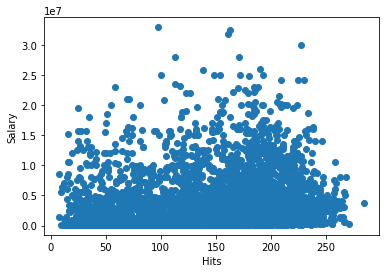

In [135]:
#Graph relationship using regression-Age is just being used to do a simple model
#If data does not look like the sample below - will use 
plt.scatter(df.Hits, df.Salary)
plt.xlabel('Hits')
plt.ylabel('Salary')
plt.show()


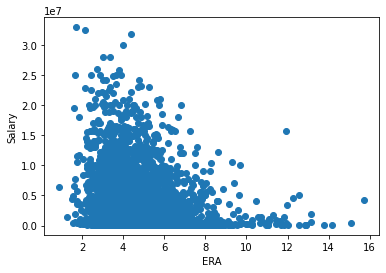

In [136]:
#Graph relationship using regression-ERA is just being used to do a simple model
#If data does not look like the sample below - will use 
plt.scatter(df.ERA, df.Salary)
#plt.gca().invert_xaxis()
plt.xlabel('ERA')
plt.ylabel('Salary')
plt.show()


In [137]:
X = df.loc[:,'ERA'].values

In [138]:
X[:10]

array([ 4.51,  5.97,  3.77,  4.53,  2.76,  3.16,  3.42,  4.93, 11.08,
       12.91])

In [139]:
y = df.loc[:,'Salary'].values

In [140]:
y[:10]

array([185000., 100000., 100000., 300000., 100000., 108000., 107500.,
       200000., 755000., 100000.])

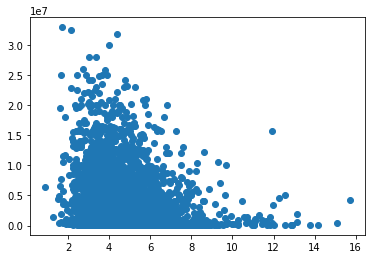

In [141]:
plt.scatter(X, y)
plt.show()

In [142]:
fit = np.polyfit(np.log(X), y, 1)

In [143]:
print(fit)

[-2666965.51746681  6986061.80672527]


In [144]:
# results mean we can predict x using the fitted log regression equation y = 6986061.80672527 - 2666965.51746681*ln(X)
#Test an ERA
Salary_predict= (6986061.80672527 - 2666965.51746681) * np.log(16)
print(Salary_predict)

11975077.661865693


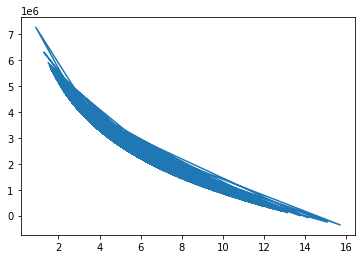

In [150]:
X2 = df.loc[:,'ERA'].values
yA = 2666965.51746681 * np.log(X2) 
y2 = 6986061.80672527 - yA
plt.plot(X2,y2)


In [151]:
# Create a model with scikit-learn
model = LinearRegression()

In [155]:
X2 = X2.reshape(-1,1)
y2 = y2.reshape(-1,1)

In [156]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
#model.fit(X, y)

In [157]:
model.fit(X2, y2)

LinearRegression()

In [158]:
print('slope:', model.coef_)


slope: [[-522762.8174456]]


In [161]:
# The model creates predicted y values based on X values
y2_pred = model.predict(X2)
print(y2_pred.shape)

(4937, 1)


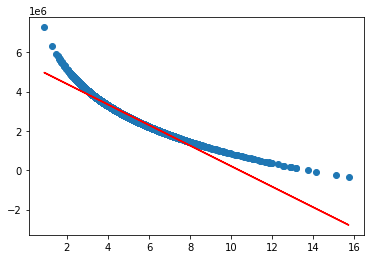

In [162]:
# Plot the results. The best fit line is red.
plt.scatter(X2, y2)
#plt.gca().invert_xaxis()
plt.plot(X2, y2_pred, color='red')
plt.show()

In [163]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[[-522762.8174456]]
[5435897.87385886]
